# Single star

[Jump down to condensed example](#condensed)

#### This notebook is a basic runthrough for a single star from beginning to end

In [1]:
from pysyd import plots
from pysyd.target import Target
from pysyd.utils import Parameters

The `Parameters` object is a container class for default `pySYD` parameters. Since the software is customizable down to the individual star level - we create one large, default dictionary, check for star-specific information and then copy that to the individual star's dictionary. So for n stars, you will have at least n keys in the main parameter dictionary.

## KIC 2309595

### Step 1. Load `pySYD` parameters

In [9]:
name = '2309595'

args = Parameters(stars=[name])

print(args.params[name])

{'path': '/Users/ashleychontos/Documents/Research/Code/special/pySYD/examples/results/2309595', 'stars': '2309595', 'rs': None, 'rs_err': None, 'teff': None, 'teff_err': None, 'logg': None, 'logg_err': None, 'show': False, 'save': True, 'verbose': False, 'overwrite': False, 'stitch': False, 'gap': 20, 'kep_corr': False, 'oversampling_factor': None, 'excess': True, 'numax': None, 'dnu': None, 'binning': 0.005, 'bin_mode': 'mean', 'lower_ex': 100.0, 'upper_ex': 8000.0, 'step': 0.25, 'smooth_width': 20.0, 'n_trials': 3, 'ask': False, 'background': True, 'basis': 'tau_sigma', 'box_filter': 1.0, 'fix_wn': False, 'n_laws': None, 'ind_width': 20.0, 'lower_bg': 100.0, 'upper_bg': 8000.0, 'metric': 'bic', 'n_rms': 20, 'globe': True, 'ex_width': 1.0, 'lower_ps': None, 'upper_ps': None, 'sm_par': None, 'method': 'D', 'n_peaks': 5, 'smooth_ps': 2.5, 'threshold': 1.0, 'hey': False, 'cmap': 'binary', 'clip_value': 3.0, 'interp_ech': False, 'notching': False, 'lower_ech': None, 'upper_ech': None, 'se

Essentially we have two ways we can access or change information. Since this step already made copies of the individual star dictionaries, you will also need to add the star's name as a keyword argument if you want to change things directly from the `utils.Parameters` class object.

In [10]:
# Both verbose output and displaying of figures are disabled since the software is
# optimized for running many stars, so let's change those!

args.params[name]['show'] = True
args.params[name]['verbose'] = True

Now that we have the relevant information we want, let's create a pipeline `Target` object (or star).

### Step 2. Create pipeline `Target` object

In [11]:
star = Target(name, args)


-----------------------------------------------------------
Target: 2309595
-----------------------------------------------------------
# LIGHT CURVE: 41949 lines of data read
# Time series cadence: 59 seconds
# POWER SPECTRUM: 106123 lines of data read
# PS oversampled by a factor of 5
# PS resolution: 0.400298 muHz


The individual star's dictionary is copied to the main params class for this object, so now you only have the single dictionary (you can think of it as a `pop` of the main dictionary, but it makes copies instead of removing). This means we can directly access the defaults without using the star's name as a keyword -- so now we can change whatever we want directly!

In [12]:
print(star.params)

{'path': '/Users/ashleychontos/Documents/Research/Code/special/pySYD/examples/results/2309595', 'stars': '2309595', 'rs': None, 'rs_err': None, 'teff': None, 'teff_err': None, 'logg': None, 'logg_err': None, 'show': True, 'save': True, 'verbose': True, 'overwrite': False, 'stitch': False, 'gap': 20, 'kep_corr': False, 'oversampling_factor': 5, 'excess': True, 'numax': None, 'dnu': None, 'binning': 0.005, 'bin_mode': 'mean', 'lower_ex': 100.0, 'upper_ex': 8000.0, 'step': 0.25, 'smooth_width': 20.0, 'n_trials': 3, 'ask': False, 'background': True, 'basis': 'tau_sigma', 'box_filter': 1.0, 'fix_wn': False, 'n_laws': None, 'ind_width': 20.0, 'lower_bg': 100.0, 'upper_bg': 8000.0, 'metric': 'bic', 'n_rms': 20, 'globe': True, 'ex_width': 1.0, 'lower_ps': None, 'upper_ps': None, 'sm_par': None, 'method': 'D', 'n_peaks': 5, 'smooth_ps': 2.5, 'threshold': 1.0, 'hey': False, 'cmap': 'binary', 'clip_value': 3.0, 'interp_ech': False, 'notching': False, 'lower_ech': None, 'upper_ech': None, 'seed': 

As you'll see, this step checks and loads in data for a given star `name`, which will save a boolean flag as the `star.ok` attribute, as in it's 'ok' to proces.

In [13]:
print(star.ok)

True


Looks like we've been cleared!

Let's estimate some starting points for the main module.

### Step 3. Estimate parameters

-----------------------------------------------------------
PS binned to 214 datapoints

Numax estimates
---------------
Numax estimate 1: 631.20 +/- 9.69
S/N: 12.71
Numax estimate 2: 637.10 +/- 30.89
S/N: 10.63
Numax estimate 3: 654.27 +/- 85.26
S/N: 8.28
Selecting model 1


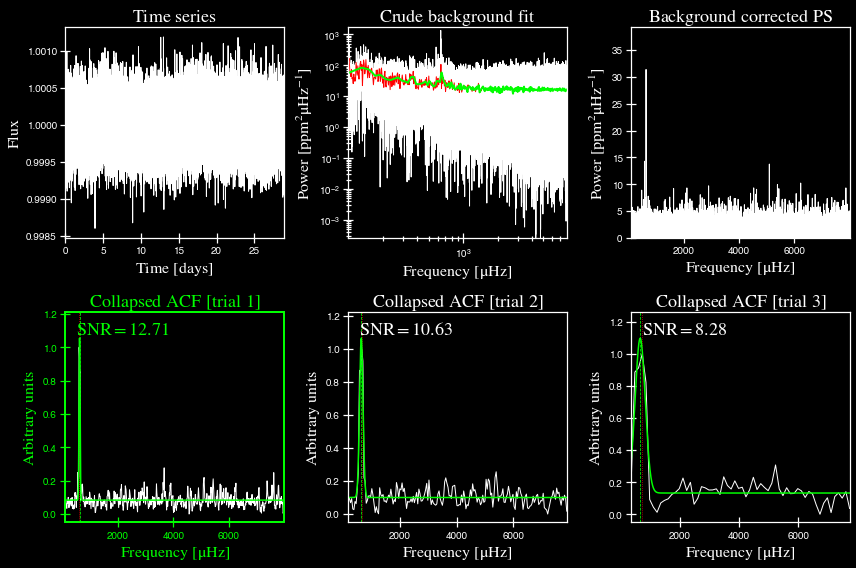

In [14]:
star.estimate_parameters()
plots.set_plot_params()       # normally we won't need to do this but for demonstration purposes...
plots.plot_estimates(star)

All the trials give consistent answers for $\rm \nu_{max}$ that I also agree with by eye, so I think we can move on to the full fit.

### Step 4. Derive parameters

-----------------------------------------------------------
GLOBAL FIT
-----------------------------------------------------------
PS binned to 368 data points

Background model
----------------
Comparing 4 different models:
Model 0: 0 Harvey-like component(s) + white noise fixed
 BIC = 17431.37 | AIC = 47.37
Model 1: 0 Harvey-like component(s) + white noise term
 BIC = 17410.08 | AIC = 47.30
Model 2: 1 Harvey-like component(s) + white noise fixed
 BIC = 3365.74 | AIC = 9.12
Model 3: 1 Harvey-like component(s) + white noise term
 BIC = 3436.56 | AIC = 9.31
Based on BIC statistic: model 2


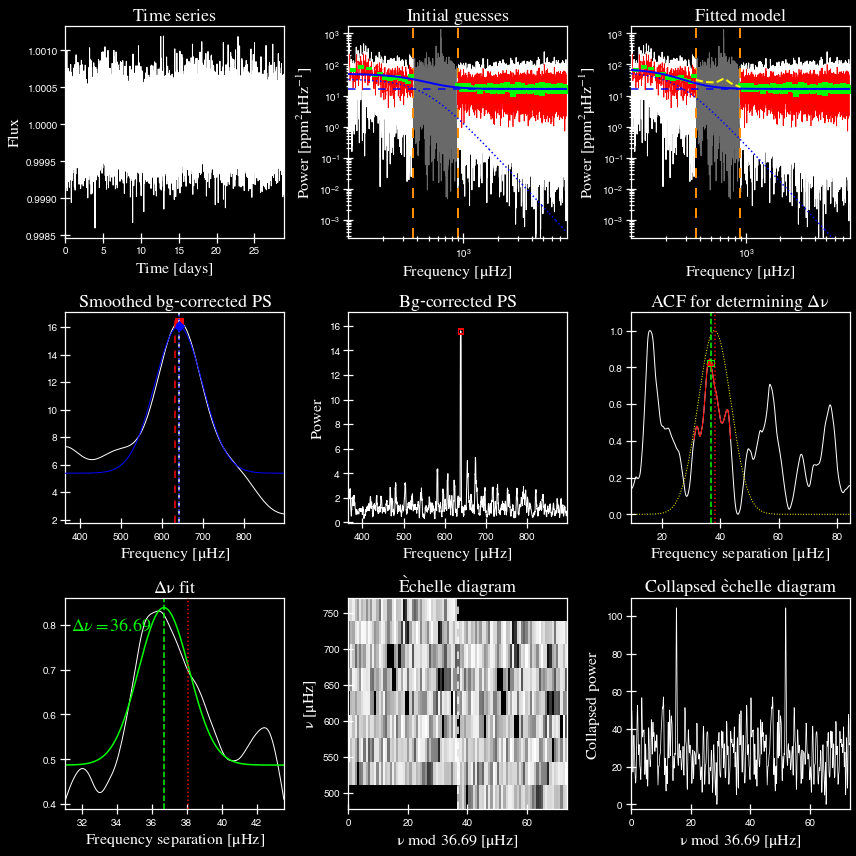

In [15]:
star.derive_parameters()
plots.plot_parameters(star)

In the verbose output, the 'output parameters' have no uncertainties on the derived values. This is because the number of iterations is 1 by default, for a single iteration. You also might've noticed that there are two different estimates for $\rm \nu_{max}$. **For posterity, the `SYD` pipeline also estimated both of these values but traditionally used** $\rm \nu_{max,smooth}$ **within the literature.** ***We recommend that you do the same.***

To estimate uncertainties for these parameters, we'll need to set the number of iterations to something much higher (typically on the order of a hundred or so).

### Step 5. Derive uncertainties

In [16]:
star.params['show']=False
star.params['mc_iter']=200
star.process_star()

-----------------------------------------------------------
PS binned to 214 datapoints

Numax estimates
---------------
Numax estimate 1: 631.20 +/- 9.69
S/N: 12.71
Numax estimate 2: 637.10 +/- 30.89
S/N: 10.63
Numax estimate 3: 654.27 +/- 85.26
S/N: 8.28
Selecting model 1
-----------------------------------------------------------
GLOBAL FIT
-----------------------------------------------------------
PS binned to 368 data points

Background model
----------------
Comparing 2 different models:
Model 0: 0 Harvey-like component(s) + white noise fixed
 BIC = 17431.37 | AIC = 47.37
Model 1: 1 Harvey-like component(s) + white noise fixed
 BIC = 3365.74 | AIC = 9.12
Based on BIC statistic: model 1


  0%|          | 0/200 [00:00<?, ?it/s]

-----------------------------------------------------------
Sampling routine:


100%|██████████| 200/200 [00:21<00:00,  9.50it/s]


-----------------------------------------------------------
Output parameters
-----------------------------------------------------------
numax_smooth: 642.56 +/- 7.72 muHz
A_smooth: 16.39 +/- 4.51 ppm^2/muHz
numax_gauss: 640.96 +/- 35.61 muHz
A_gauss: 10.68 +/- 7.98 ppm^2/muHz
FWHM: 58.22 +/- 37.94 muHz
dnu: 36.69 +/- 1.45 muHz
tau_1: 615.64 +/- 159.42 s
sigma_1: 155.25 +/- 13.62 ppm
-----------------------------------------------------------


### Step 6. Peep results

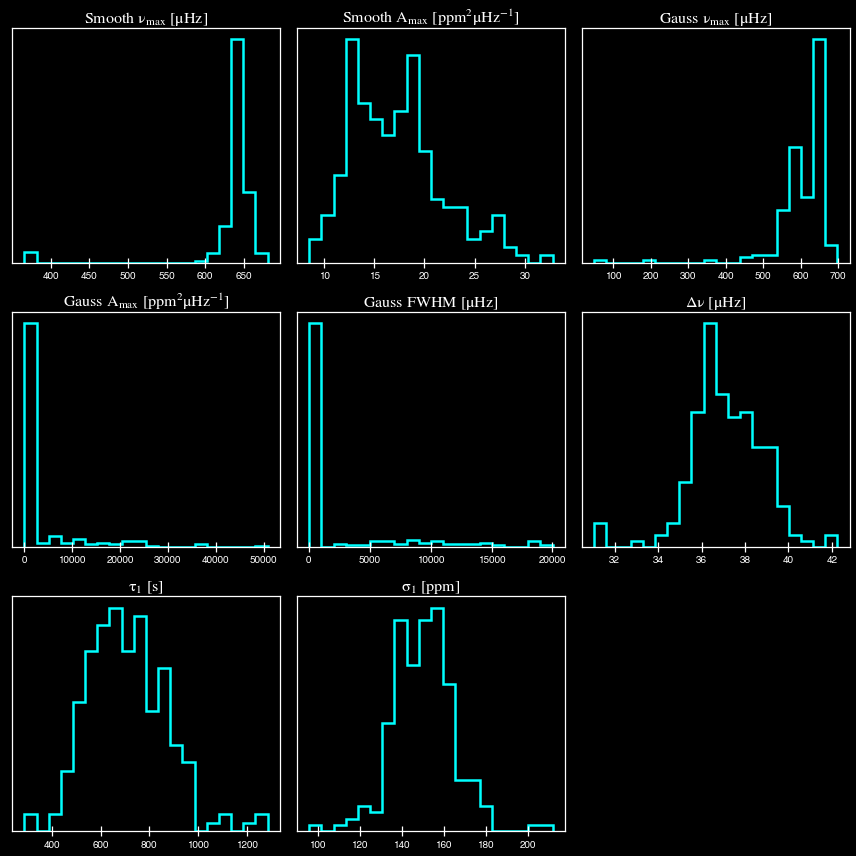

In [17]:
star.params['show']=True
plots.plot_samples(star)

It looks like it only iterated through 2 models as opposed to the initial 4. The reason for this is that the 'fix_wn' is set after the model selection, so let's change it back to see if its selection changes for the background model.

In [18]:
star.params['show']=False
star.params['fix_wn']=False
star.process_star()

-----------------------------------------------------------
PS binned to 214 datapoints

Numax estimates
---------------
Numax estimate 1: 631.20 +/- 9.69
S/N: 12.71
Numax estimate 2: 637.10 +/- 30.89
S/N: 10.63
Numax estimate 3: 654.27 +/- 85.26
S/N: 8.28
Selecting model 1
-----------------------------------------------------------
GLOBAL FIT
-----------------------------------------------------------
PS binned to 368 data points

Background model
----------------
Comparing 4 different models:
Model 0: 0 Harvey-like component(s) + white noise fixed
 BIC = 17431.37 | AIC = 47.37
Model 1: 0 Harvey-like component(s) + white noise term
 BIC = 17410.08 | AIC = 47.30
Model 2: 1 Harvey-like component(s) + white noise fixed
 BIC = 3365.74 | AIC = 9.12
Model 3: 1 Harvey-like component(s) + white noise term
 BIC = 3436.56 | AIC = 9.31
Based on BIC statistic: model 2


  0%|          | 0/200 [00:00<?, ?it/s]

-----------------------------------------------------------
Sampling routine:


100%|██████████| 200/200 [00:20<00:00,  9.96it/s]


-----------------------------------------------------------
Output parameters
-----------------------------------------------------------
numax_smooth: 642.56 +/- 10.68 muHz
A_smooth: 16.39 +/- 3.51 ppm^2/muHz
numax_gauss: 640.96 +/- 29.76 muHz
A_gauss: 10.68 +/- 7.39 ppm^2/muHz
FWHM: 58.22 +/- 33.65 muHz
dnu: 36.69 +/- 1.45 muHz
tau_1: 615.64 +/- 145.70 s
sigma_1: 155.25 +/- 12.52 ppm
-----------------------------------------------------------


As you can see, it still liked the same model (good sanity check) and the derived value for $\rm \nu_{max}$ was robust to this and did not change.

So now we have both parameters and uncertainties!

# Condensed version <a id='condensed'></a>

\[ Putting it all together with `star.process_star()` \]

In [19]:
name='2309595'
args = Parameters(stars=[name])
args.params[name]['verbose'] = True   # let's only use the verbose option to keep the printed output to a reasonable level
args.params[name]['mc_iter'] = 200
star = Target(name, args)
if star.ok:
    star.process_star()


-----------------------------------------------------------
Target: 2309595
-----------------------------------------------------------
# LIGHT CURVE: 41949 lines of data read
# Time series cadence: 59 seconds
# POWER SPECTRUM: 106123 lines of data read
# PS oversampled by a factor of 5
# PS resolution: 0.400298 muHz
-----------------------------------------------------------
PS binned to 214 datapoints

Numax estimates
---------------
Numax estimate 1: 631.20 +/- 9.69
S/N: 12.71
Numax estimate 2: 637.10 +/- 30.89
S/N: 10.63
Numax estimate 3: 654.27 +/- 85.26
S/N: 8.28
Selecting model 1
-----------------------------------------------------------
GLOBAL FIT
-----------------------------------------------------------
PS binned to 368 data points

Background model
----------------
Comparing 4 different models:
Model 0: 0 Harvey-like component(s) + white noise fixed
 BIC = 17431.37 | AIC = 47.37
Model 1: 0 Harvey-like component(s) + white noise term
 BIC = 17410.08 | AIC = 47.30
Model 2: 

  1%|          | 2/200 [00:00<00:10, 18.73it/s]

-----------------------------------------------------------
Sampling routine:


100%|██████████| 200/200 [00:22<00:00,  9.06it/s]


-----------------------------------------------------------
Output parameters
-----------------------------------------------------------
numax_smooth: 642.56 +/- 8.90 muHz
A_smooth: 16.39 +/- 3.57 ppm^2/muHz
numax_gauss: 640.96 +/- 27.79 muHz
A_gauss: 10.68 +/- 7.82 ppm^2/muHz
FWHM: 58.22 +/- 35.59 muHz
dnu: 36.69 +/- 1.27 muHz
tau_1: 615.64 +/- 158.33 s
sigma_1: 155.25 +/- 11.78 ppm
-----------------------------------------------------------
